In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [3]:
morphotopes = gpd.read_parquet('/data/uscuni-evolution/germany_ages/morphotopes_age.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,,,,,,,,,,
21904_1448_1,"MULTIPOLYGON (((4324315.825 3046254.826, 43243...",False,1,2,5,8,13,27,55,46,1957.83,1957.0,1868,1910.5,1999.0,2000,34.76,"(1948, 1978]"
21904_1448_0,"MULTIPOLYGON (((4324277.274 3046327.723, 43242...",False,1,2,5,8,13,27,55,43,1929.79,1936.0,1863,1881.4,1975.4,2000,38.55,"(0, 1919]"
29344_127_5,"MULTIPOLYGON (((4325504.81 3048061.995, 432550...",False,1,2,5,8,13,27,55,65,1911.40,1909.0,1860,1868.2,1960.6,1997,34.80,"(0, 1919]"
29344_127_4,"MULTIPOLYGON (((4325695.146 3048046.646, 43256...",False,2,4,7,13,20,47,86,65,1914.29,1902.0,1863,1879.8,1967.0,1998,34.26,"(0, 1919]"
29344_127_2,"MULTIPOLYGON (((4325571.721 3047890.038, 43255...",False,2,4,7,12,19,45,82,26,1949.81,1955.5,1886,1910.5,1969.5,1977,23.94,"(1948, 1978]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053_210_1,"MULTIPOLYGON (((4330639.63 2774092.038, 433063...",False,2,4,7,15,22,50,93,44,1978.93,1970.5,1951,1953.0,2006.7,2008,20.89,"(1948, 1978]"
25202_27_0,"MULTIPOLYGON (((4329009.557 2738156.632, 43290...",False,1,2,5,8,13,27,55,6,1895.00,1885.0,1860,1862.0,1938.0,1966,39.97,"(0, 1919]"
18557_597_2,"MULTIPOLYGON (((4329532.524 2733302.757, 43295...",False,1,2,5,8,13,29,59,35,1952.23,1962.0,1871,1902.6,1971.6,1976,28.39,"(1948, 1978]"


In [4]:
morphotopes["num_buildings"].max()

np.int64(627)

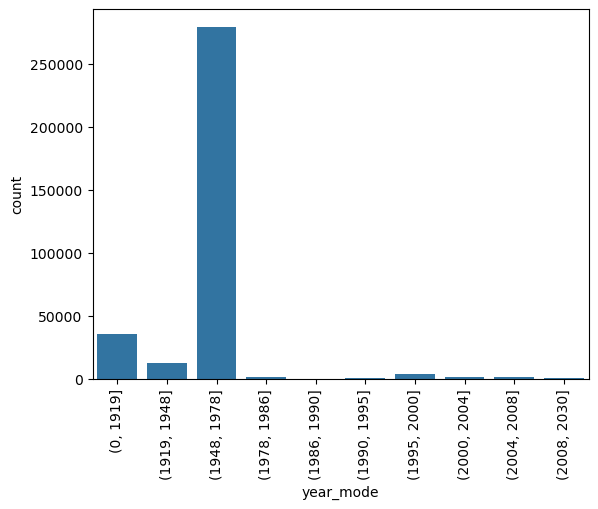

In [5]:
sns.countplot(x='year_mode', data=morphotopes, order=sorted(morphotopes["year_mode"].unique())  # alphabetical order
)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()

In [6]:
bins = list(range(1859, 2029, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

def histogram(year_method):
    morphotopes.hist(column=f"year_{year_method}",bins=bins, rwidth=0.8)
    plt.xticks(bin_centers, bin_labels, rotation=90)
    plt.grid(False)

In [7]:
def hist_morph_types(lvl):
    grouped = (
        morphotopes
        .assign(weighted_count=lambda df: df['num_buildings'])
        .groupby(["year_mode", f"level_{lvl}_label"])['weighted_count']
        .sum()
        .reset_index()
    )
    pivot_df = grouped.pivot(index="year_mode", columns=f"level_{lvl}_label", values="weighted_count").fillna(0)
    pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    n_categories = len(pivot_df.columns)
    cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"
    colors = [cmap(i) for i in range(n_categories)]
    pivot_pct.plot(kind="bar", stacked=True, color=colors, figsize=(12,6))
    plt.legend(title=f"Level {lvl} Type", bbox_to_anchor=(1.05, 1))

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


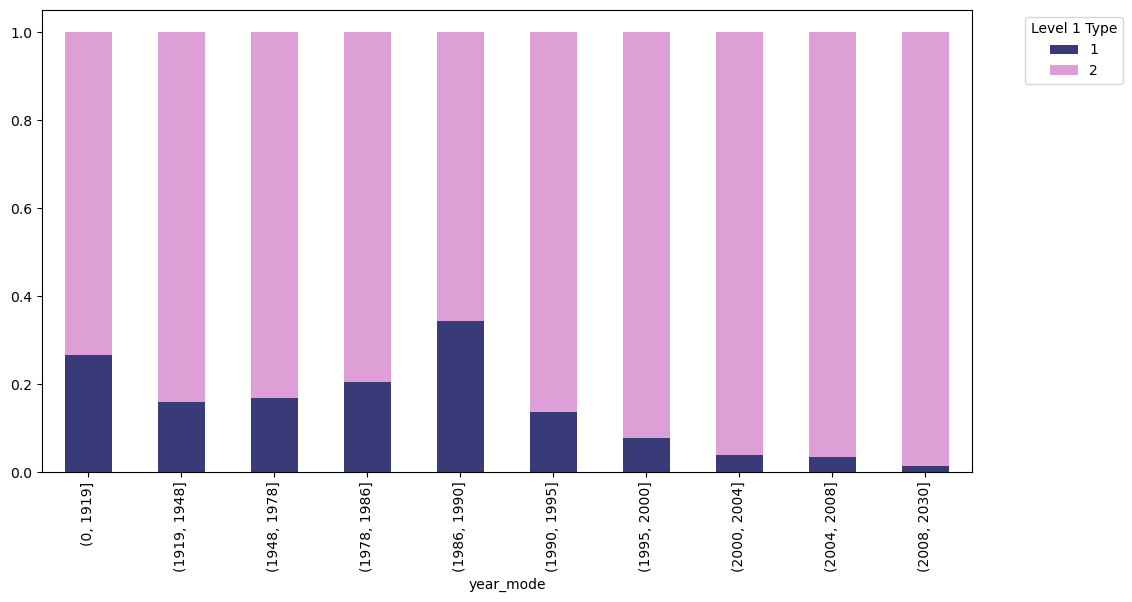

In [8]:
hist_morph_types(1)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


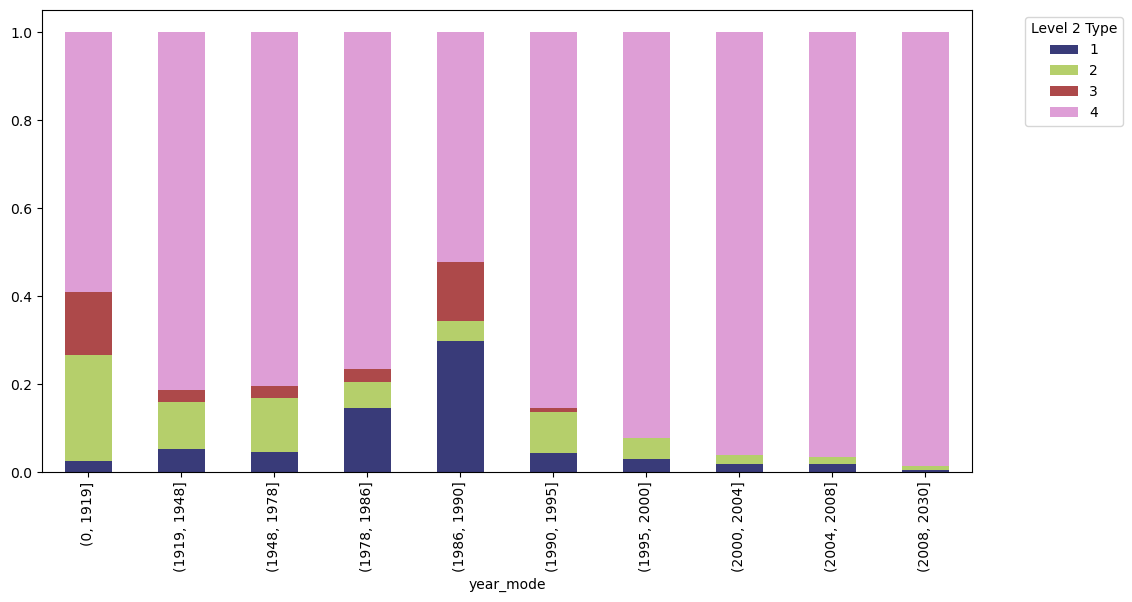

In [10]:
hist_morph_types(2)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


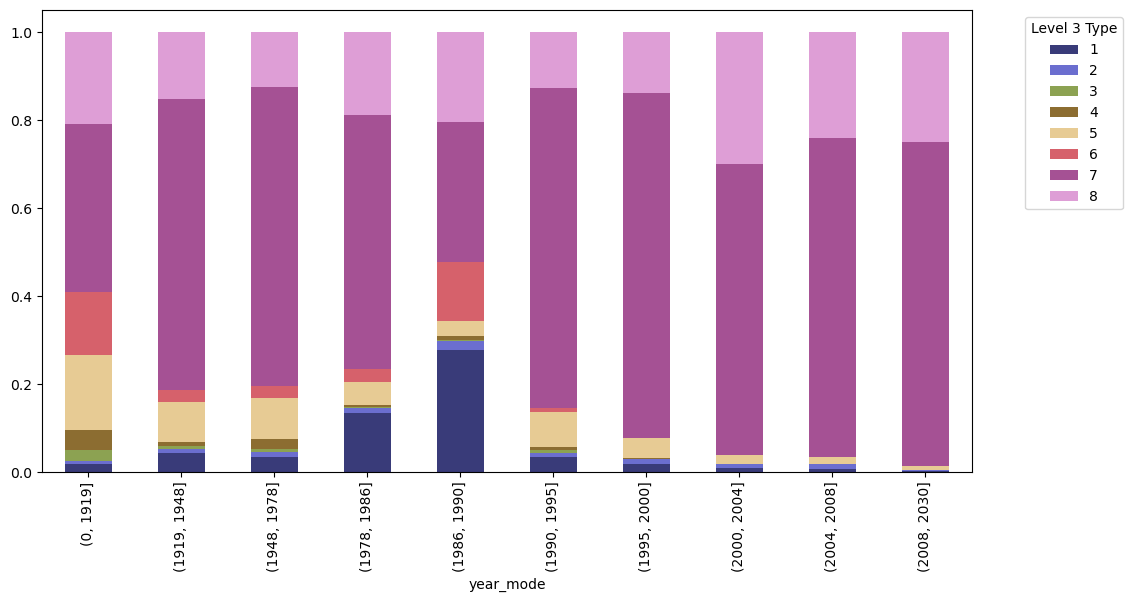

In [11]:
hist_morph_types(3)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


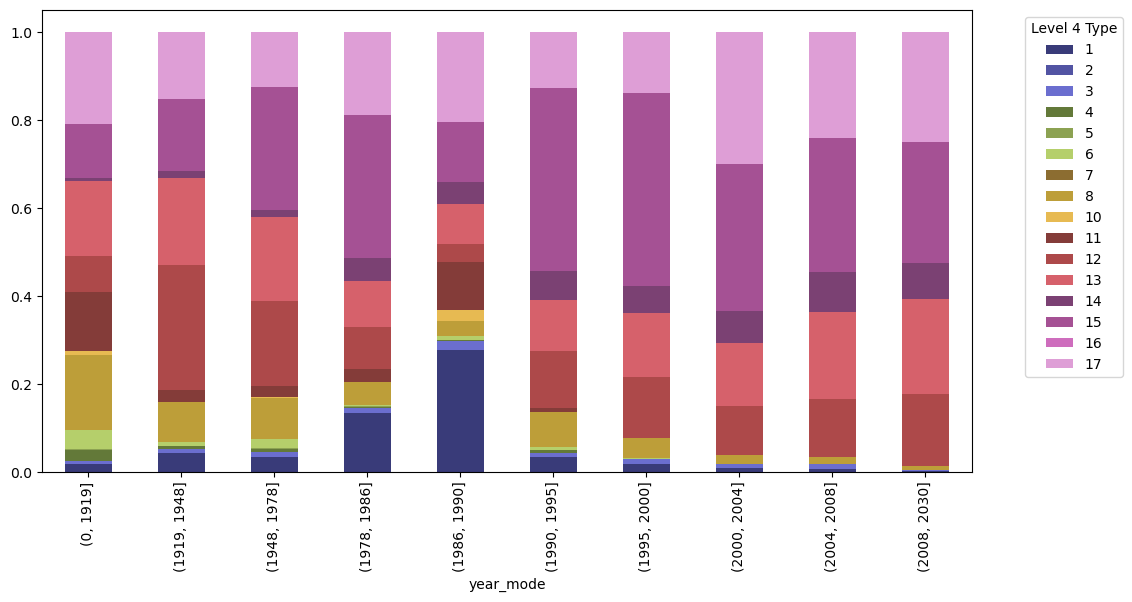

In [12]:
hist_morph_types(4)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


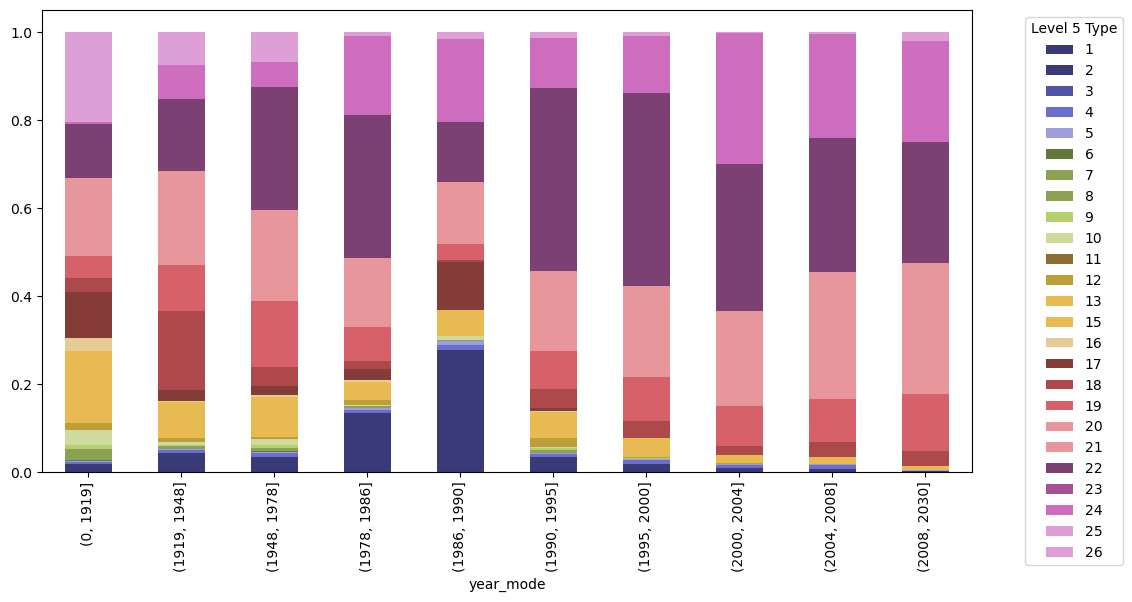

In [13]:
hist_morph_types(5)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


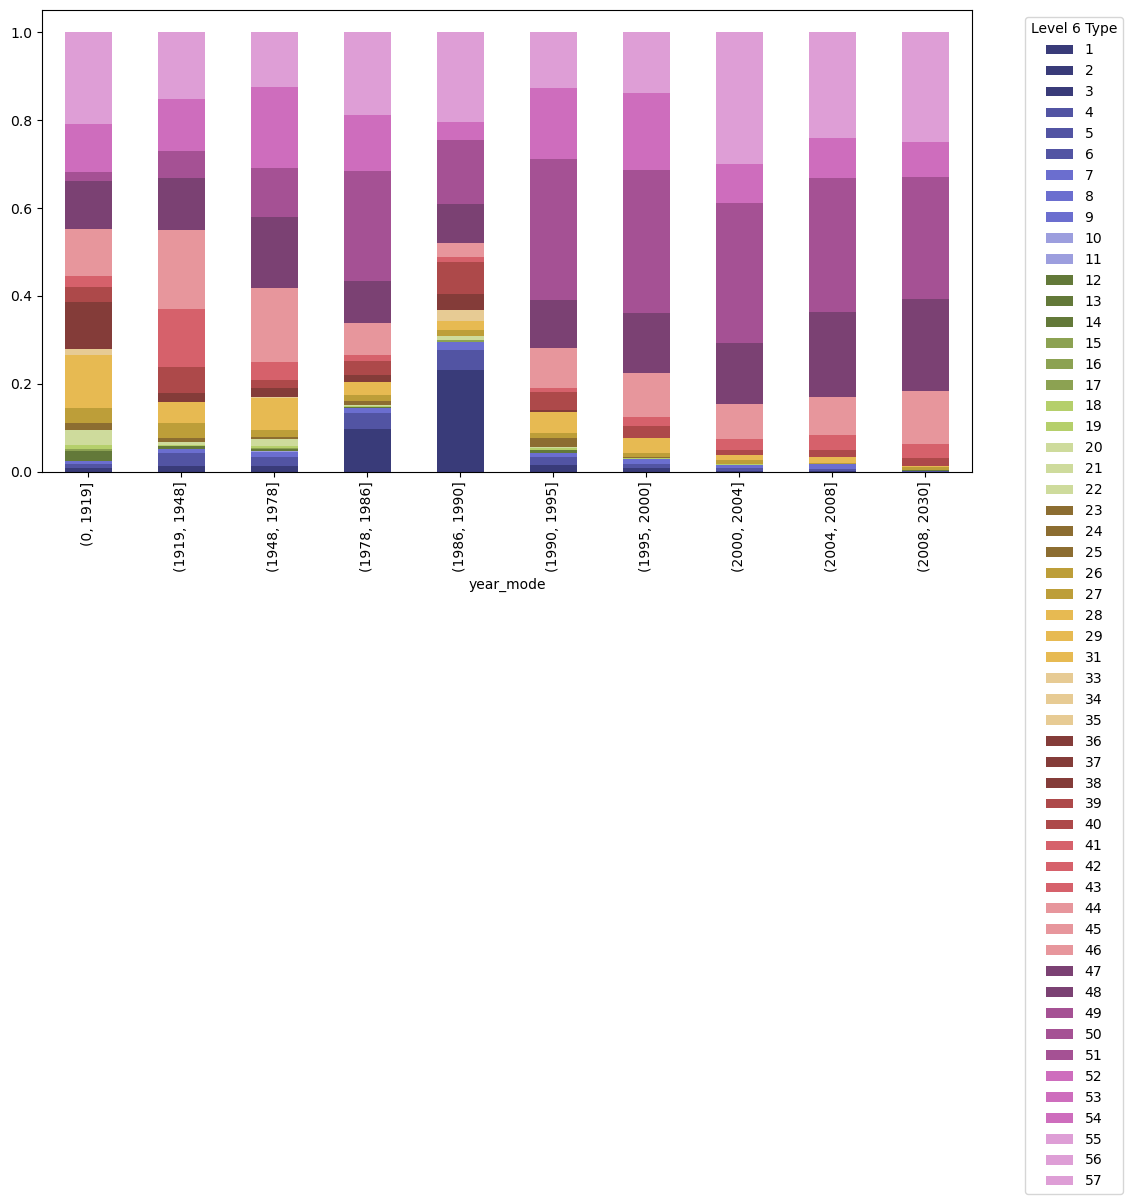

In [14]:
hist_morph_types(6)

/tmp/ipykernel_92936/1601523863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"


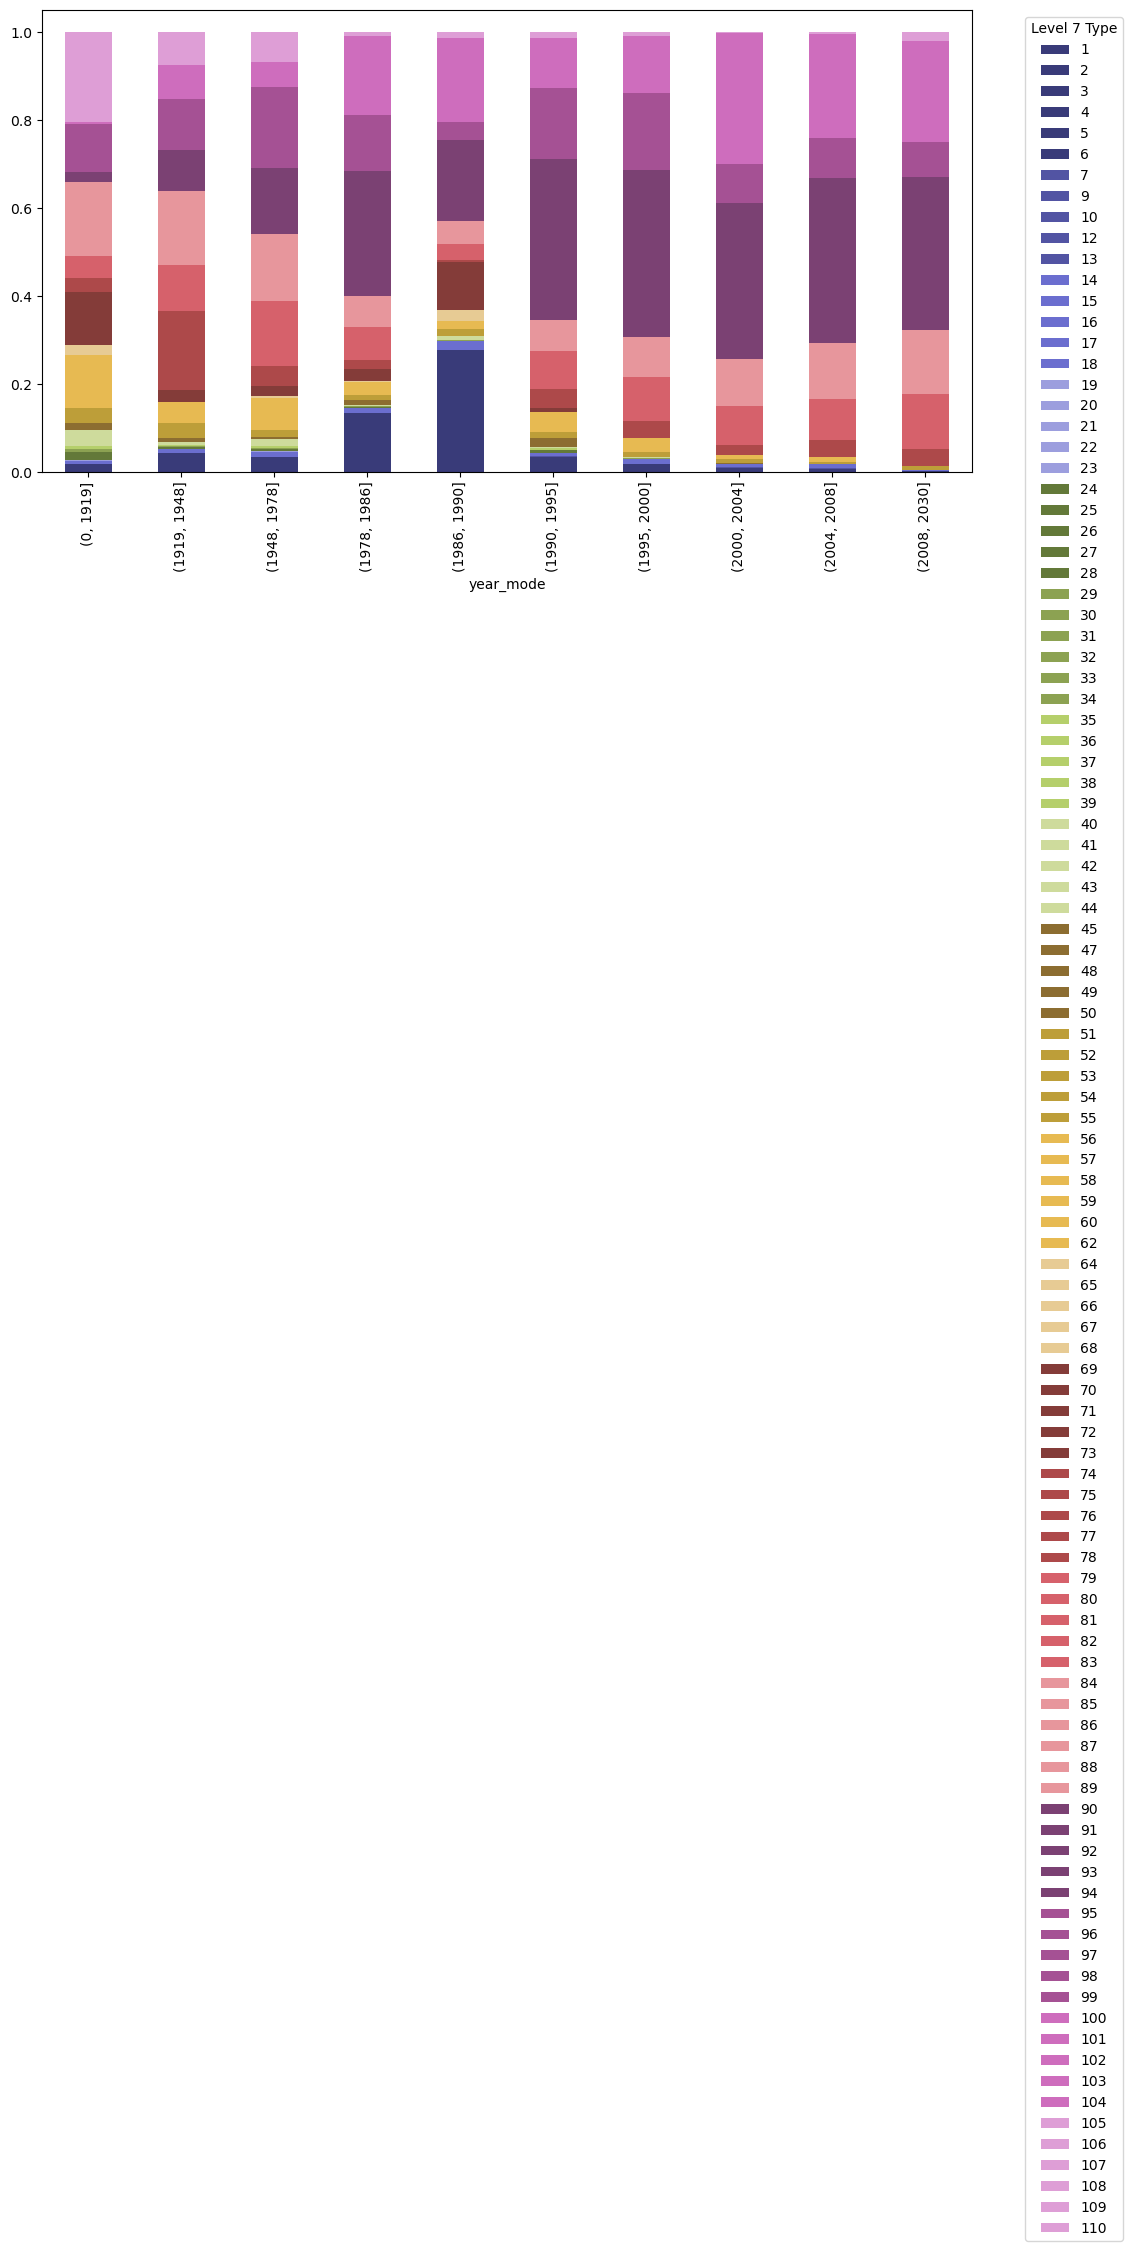

In [15]:
hist_morph_types(7)

In [16]:
morphotopes['year_bin'] = pd.cut(morphotopes['year'], bins=bins, labels=bin_labels, right=False)

avg_buildings = (
    morphotopes
    .groupby('year_bin')['num_buildings']
    .agg(['count', 'mean', 'median', 'min', 'max', 'std', 'sum'])
    .reset_index()
)
avg_buildings

KeyError: 'year'